In [ ]:
!pip install fairlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 3.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from fairlearn.metrics import MetricFrame, selection_rate

In [ ]:
data= pd.read_csv("/content/Civil_Service_List__Active.csv")

In [ ]:
print(data.columns.values)

['Exam No' 'List No' 'First Name' 'MI' 'Last Name' 'Adj. FA'
 'List Title Code' 'List Title Desc' 'Group No' 'List Agency Code'
 'List Agency Desc' 'List Div Code' 'Published Date' 'Established Date'
 'Anniversary Date' 'Extension Date' 'Veteran Credit' 'Parent Lgy Credit'
 'Sibling Lgy Credit' 'Residency Credit']


In [ ]:
# Preprocess
data = data[['Adj. FA', 'List Title Desc', 'List Agency Desc', 'Veteran Credit', 'Parent Lgy Credit', 'Sibling Lgy Credit', 'Residency Credit']]
data = pd.get_dummies(data, drop_first=True)
#data = pd.get_dummies(data)

In [ ]:
print(data.columns.values)

['Adj. FA' 'List Title Desc_ADMINISTRATIVE ACCOUNTANT'
 'List Title Desc_ADMINISTRATIVE ACTUARY'
 'List Title Desc_ADMINISTRATIVE ARCHITECT'
 'List Title Desc_ADMINISTRATIVE BUSINESS PROMOTION COORDINATOR'
 'List Title Desc_ADMINISTRATIVE CITY PLANNER'
 'List Title Desc_ADMINISTRATIVE CLAIM EXAMINER'
 'List Title Desc_ADMINISTRATIVE COMMUNITY RELATIONS SPECIALIST'
 'List Title Desc_ADMINISTRATIVE CONSTRUCTION PROJECT MANAGER'
 'List Title Desc_ADMINISTRATIVE CONSULTANT (EARLY CHILDHOOD EDUCATION)'
 'List Title Desc_ADMINISTRATIVE CONTRACT SPECIALIST'
 'List Title Desc_ADMINISTRATIVE DIRECTOR OF RESIDENTIAL CHILD CARE'
 'List Title Desc_ADMINISTRATIVE DIRECTOR OF SOCIAL SERVICES'
 'List Title Desc_ADMINISTRATIVE EDUCATION ANALYST'
 'List Title Desc_ADMINISTRATIVE EDUCATION OFFICER'
 'List Title Desc_ADMINISTRATIVE ENGINEER'
 'List Title Desc_ADMINISTRATIVE HORTICULTURIST'
 'List Title Desc_ADMINISTRATIVE HOUSING DEVELOPMENT SPECIALIST'
 'List Title Desc_ADMINISTRATIVE HOUSING MANAGER'
 

In [ ]:
# Split data into sensitive features and other features
X = data.drop('Adj. FA', axis=1)
y = data['Adj. FA']

# Binarize the target variable
y = (y > y.mean()).astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.7002197198571821


<Axes: title={'center': 'Selection Rate by Veteran Status'}, xlabel="Veteran Credit_Veteran's Credit", ylabel='Selection Rate'>

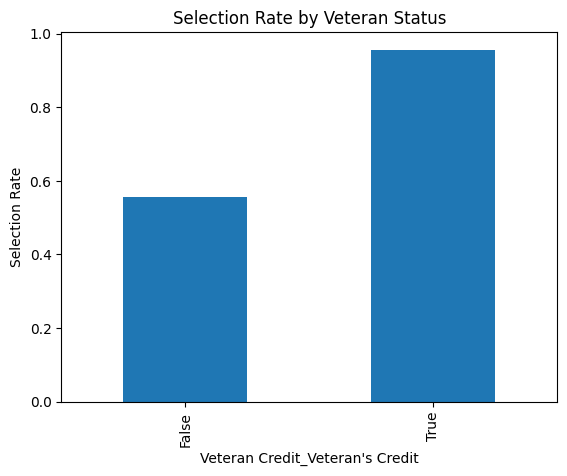

In [ ]:
# Create a MetricFrame
metric_frame = MetricFrame(metrics=selection_rate,
                           y_true=y_test,
                           y_pred=y_pred,
                           sensitive_features=X_test["Veteran Credit_Veteran's Credit"])

# Plot the selection rates
metric_frame.by_group.plot.bar(
    legend=False,
    ylabel="Selection Rate",
    title="Selection Rate by Veteran Status",
)

In [ ]:
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
from fairlearn.metrics import MetricFrame, selection_rate

In [ ]:
# Define base estimator
estimator = LogisticRegression(max_iter=1000)

# Train the estimator
estimator.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Apply fairness constraint: Demographic Parity
fair_model = ExponentiatedGradient(
    estimator,
    constraints=DemographicParity(),
    eps=0.01  # fairness tolerance
)

In [ ]:
# Define sensitive features for the test set
sf_test = X_test["Veteran Credit_Veteran's Credit"]

# Evaluate fairness and accuracy
metric_frame = MetricFrame(
    metrics={
        "Selection Rate": selection_rate,
        "Accuracy": accuracy_score
    },
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=sf_test
)

# Print the overall and by-group metrics
print("Overall metrics:")
print(metric_frame.overall)
print("\nMetrics by group:")
print(metric_frame.by_group)
print("\nOverall Accuracy:", accuracy_score(y_test, y_pred))


Overall metrics:
Selection Rate    0.564474
Accuracy          0.700220
dtype: float64

Metrics by group:
                                 Selection Rate  Accuracy
Veteran Credit_Veteran's Credit                          
False                                  0.556288  0.699005
True                                   0.956376  0.758389

Overall Accuracy: 0.7002197198571821
